In [29]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pip install gmplot
import gmplot
# For improved table display in the notebook
from IPython.display import display
# pip install gmaps
import gmaps
import gmaps.datasets
# Statmodels & patsy
import patsy
import statsmodels.api as sm

In [30]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [31]:
# read in the dispatch time data 
dis = pd.read_csv('dispatch_time.csv')

In [32]:
dis

,No.,District,2010 White Percentage,June 2013 Average Dispatch Time Priority 1,July 2013 Average Dispatch Time Priority 1,Aug 2013 Average Dispatch Time Priority 1,Sep 2013 Average Dispatch Time Priority 1
0,18,Near North,75.50%,0:02:46,0:02:45,0:02:27,0:02:40
1,19,Town Hall,75.00%,0:04:07,0:03:19,0:03:44,0:03:36
2,16,Jefferson Park,69.20%,0:03:15,0:02:26,0:02:59,0:02:49
...,...,...,...,...,...,...,...
19,5,Calumet,1.10%,0:05:59,0:06:03,0:05:40,0:07:19
20,7,Englewood,0.40%,0:03:00,0:03:38,0:04:19,0:03:28
21,6,Gresham,0.30%,0:05:23,0:05:35,0:04:59,0:05:22


In [33]:
#rename each column 
dis.columns = ['No.', 'District', 'White_percentage', 'Jun', 'Jul', 'Aug','Sep']

In [34]:
dis

,No.,District,White_percentage,Jun,Jul,Aug,Sep
0,18,Near North,75.50%,0:02:46,0:02:45,0:02:27,0:02:40
1,19,Town Hall,75.00%,0:04:07,0:03:19,0:03:44,0:03:36
2,16,Jefferson Park,69.20%,0:03:15,0:02:26,0:02:59,0:02:49
...,...,...,...,...,...,...,...
19,5,Calumet,1.10%,0:05:59,0:06:03,0:05:40,0:07:19
20,7,Englewood,0.40%,0:03:00,0:03:38,0:04:19,0:03:28
21,6,Gresham,0.30%,0:05:23,0:05:35,0:04:59,0:05:22


In [35]:
# Satndardize data in White % column 
white = dis['White_percentage'].str.replace('%','')
dis['White_percentage'] = pd.to_numeric(white)
# Covert White % data to 
dis['White_percentage'] = dis['White_percentage'].astype(int)
dis

,No.,District,White_percentage,Jun,Jul,Aug,Sep
0,18,Near North,75,0:02:46,0:02:45,0:02:27,0:02:40
1,19,Town Hall,75,0:04:07,0:03:19,0:03:44,0:03:36
2,16,Jefferson Park,69,0:03:15,0:02:26,0:02:59,0:02:49
...,...,...,...,...,...,...,...
19,5,Calumet,1,0:05:59,0:06:03,0:05:40,0:07:19
20,7,Englewood,0,0:03:00,0:03:38,0:04:19,0:03:28
21,6,Gresham,0,0:05:23,0:05:35,0:04:59,0:05:22


In [36]:
# Satndardize data in dispatch time 
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


In [37]:
dis["Jun"] = dis["Jun"].apply(get_sec)
dis["Jul"] = dis["Jul"].apply(get_sec)
dis["Aug"] = dis["Aug"].apply(get_sec)
dis["Sep"] = dis["Sep"].apply(get_sec)

In [38]:
dis

,No.,District,White_percentage,Jun,Jul,Aug,Sep
0,18,Near North,75,166,165,147,160
1,19,Town Hall,75,247,199,224,216
2,16,Jefferson Park,69,195,146,179,169
...,...,...,...,...,...,...,...
19,5,Calumet,1,359,363,340,439
20,7,Englewood,0,180,218,259,208
21,6,Gresham,0,323,335,299,322


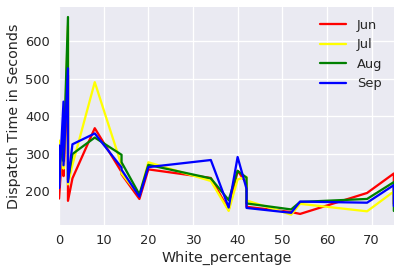

In [39]:
ax = plt.gca()

dis.plot(kind='line',x='White_percentage',y='Jun', color = "red", ax=ax)
dis.plot(kind='line',x='White_percentage',y='Jul', color = "yellow", ax=ax)
dis.plot(kind='line',x='White_percentage',y='Aug', color = "green", ax=ax)
dis.plot(kind='line',x='White_percentage',y='Sep', color = "blue", ax=ax)

plt.ylabel('Dispatch Time in Seconds')

plt.show()

#need to change colors & and make graph larger 


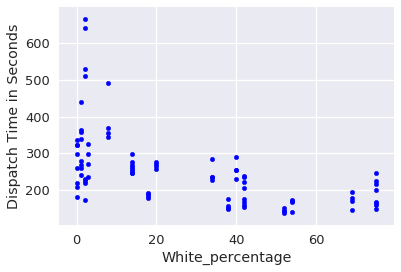

In [40]:
ax1 = dis.plot(kind='scatter', x='White_percentage', y='Jun', color='b')    
ax2 = dis.plot(kind='scatter', x='White_percentage', y='Jul', color='b', ax=ax1)    
ax3 = dis.plot(kind='scatter', x='White_percentage', y='Aug', color='b', ax=ax1)
ax4 = dis.plot(kind='scatter', x='White_percentage', y='Sep', color='b', ax=ax1)

plt.ylabel('Dispatch Time in Seconds')

plt.show()

In [41]:
#adding a column with average dispatch time
dis['avg_dispatch_time'] = np.nan
for index, row in dis.iterrows():
    avg_dispatch_time = int((row['Jun'] + row['Jul'] + row['Aug'] + row['Sep'])/4) 
    dis['avg_dispatch_time'][index] = avg_dispatch_time     
#dis

/home/fernie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
dis_new = dis[["White_percentage", "avg_dispatch_time"]]
dis_new

,White_percentage,avg_dispatch_time
0,75,159.0
1,75,221.0
2,69,172.0
...,...,...
19,1,375.0
20,0,216.0
21,0,319.0


In [43]:
# Check the correlation by computing pairwise correlation of columns, excluding NA/null values
dis_new.corr()

#notes to explain data 

,White_percentage,avg_dispatch_time
White_percentage,1.00,-0.59
avg_dispatch_time,-0.59,1.00


In [44]:
#Perform Linear Modeling for 'avg_dispatch_time' dependency on 'White %'
outcome, predictors = patsy.dmatrices('avg_dispatch_time ~ White_percentage', dis)

#  This step initializes the model, and provides the data (but does not actually compute the model)
mod = sm.OLS(outcome, predictors)

res = mod.fit()

# Check out the results
print(res.summary())

#Analyze the data and land on a conclusion of whether there is a correlation between those two

                            OLS Regression Results                            
Dep. Variable:      avg_dispatch_time   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 04 Dec 2019   Prob (F-statistic):            0.00410
Time:                        20:10:50   Log-Likelihood:                -127.48
No. Observations:                  22   AIC:                             259.0
Df Residuals:                      20   BIC:                             261.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.6509     26.287  

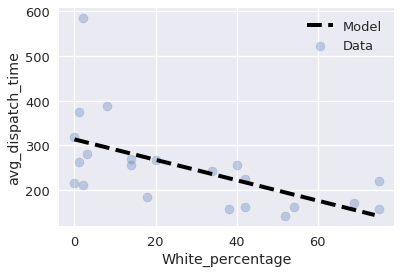

In [48]:
## Ploting the model fit line

# Plot the orginal data (as before)
plt.scatter(dis_new['White_percentage'], dis_new['avg_dispatch_time'], alpha=0.3, label='Data');

# Generate and plot the model fit line
xs = np.arange(dis_new['White_percentage'].min(), dis_new['White_percentage'].max())
ys = -2.2853 * xs + 313.6509     
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('White_percentage')
plt.ylabel('avg_dispatch_time')
plt.legend();

Based on the results from our linear model, there is a strong correlation between the average dispatch time and white percentage. Since there is a negative correlation with our linear model, this shows that our results disagrees with our hypothesis. As white percentage increases, the dispatch time is comparatively faster than neighborhoods with a lower white percentage. 

In [51]:
#Perform Linear Modeling for 'avg_dispatch_time' dependency on 'Total Crime Number'

df_crimes = pd.read_csv("Chicago_Crime_2013.csv")
df_crimes = df_crimes.dropna()
df_crimes

df_total_crime = pd.DataFrame({'Total_crime':df_crimes.shape[0]},index = range(dis.shape[0]))
dis_2 = pd.concat([dis["avg_dispatch_time"], df_total_crime], axis=1)


#Analyze the data and land on a conclusion of whether there is a correlation between those two

,Unnamed: 0,Unnamed: 0.1,ID,Case Number,...,Updated On,Latitude,Longitude,Location
0,3101,792006,9296311,HW441116,...,04/15/2016 03:49:27 PM,41.78,-87.62,"(41.78024763, -87.615102958)"
1,7445,796449,9155853,HW301604,...,05/20/2016 03:52:25 PM,41.76,-87.57,"(41.76376382, -87.567687395)"
2,11061,800146,9241979,HW387874,...,05/23/2016 03:48:54 PM,41.86,-87.63,"(41.858594819, -87.627214427)"
...,...,...,...,...,...,...,...,...,...
110201,1417064,6196447,9198660,HW344257,...,02/04/2016 06:33:39 AM,41.78,-87.70,"(41.779090123, -87.695158983)"
110202,1417065,6196448,9291937,HW437071,...,02/04/2016 06:33:39 AM,41.78,-87.70,"(41.779090123, -87.695158983)"
110203,1421925,6201317,9167530,HW312673,...,12/06/2016 03:59:16 PM,41.97,-87.65,"(41.969595207, -87.654833992)"


In [19]:
# Check the correlation 
dis_2.corr()
#notes to explain data 

,avg_dispatch_time,Total_crime
avg_dispatch_time,1.0,NaN
Total_crime,NaN,NaN


In [20]:
#Perform Linear Modeling for 'avg_dispatch_time''s dependency on both 'Total Crime Number' and 'White %'




#Analyze the data and land on a conclusion of whether there is a correlation between those three